In [41]:
#Instalo librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
#Lectura del archivo
df=pd.read_csv('Data Analytics Analyst Assestment.csv')

In [6]:
#Confirmación de lectura correcta
display(df.head(5))

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,3,Automatic,0


In [9]:
#Limpieza de datos

#Datos nulos:

print(f'Datos Nulos:\n:{df.isna()}')

Datos Nulos:
:       policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0          False          False       False                False   
1          False          False       False                False   
2          False          False       False                False   
3          False          False       False                False   
4          False          False       False                False   
...          ...            ...         ...                  ...   
58587      False          False       False                False   
58588      False          False       False                False   
58589      False          False       False                False   
58590      False          False       False                False   
58591      False          False       False                False   

       area_cluster  population_density   make  segment  model  fuel_type  \
0             False               False  False    False  False      False   
1             F

In [11]:
#Cant de datos nulos por columna
print(f'Datos Nulos:\n:{df.isna().sum()}')

Datos Nulos:
:policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
area_cluster           0
population_density     0
make                   0
segment                0
model                  0
fuel_type              0
max_torque             0
max_power              0
engine_type            0
airbags                0
cylinder               0
transmission_type      0
is_claim               0
dtype: int64


In [12]:
#Replazar valores nulos con la función df[columna].fillna(valorallenar)

In [16]:
#Separar una columna en dos, a partir de un caracter
df['CaballosFuerza']=[i.split('@')[0] for i in df['max_power']]
df['TorquePorMinuto']=[i.split('@')[1] for i in df['max_power']]
display(df.head(5))


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim,Caballosfuerza,CaballosFuerza,TorquePorMinuto
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36bhp,40.36bhp,6000rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36bhp,40.36bhp,6000rpm
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36bhp,40.36bhp,6000rpm
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0,88.50bhp,88.50bhp,6000rpm
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,3,Automatic,0,67.06bhp,67.06bhp,5500rpm


In [18]:
#Analisis de datos

df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,cylinder,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,3.626963,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,0.483616,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,3.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,3.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,4.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,4.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,4.000000,1.000000


array([[<Axes: title={'center': 'policy_tenure'}>,
        <Axes: title={'center': 'age_of_car'}>,
        <Axes: title={'center': 'age_of_policyholder'}>],
       [<Axes: title={'center': 'population_density'}>,
        <Axes: title={'center': 'make'}>,
        <Axes: title={'center': 'airbags'}>],
       [<Axes: title={'center': 'cylinder'}>,
        <Axes: title={'center': 'is_claim'}>, <Axes: >]], dtype=object)

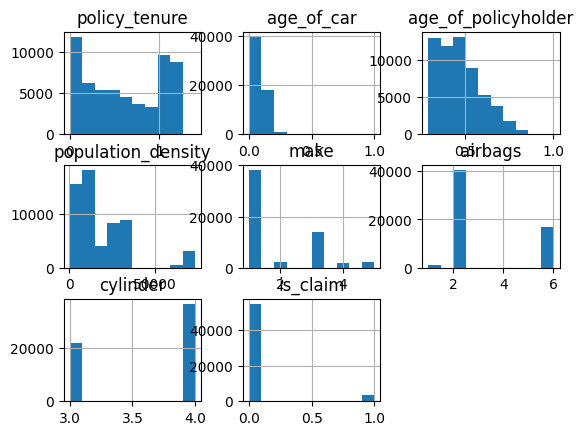

In [20]:
#Grafico histograma
df.hist()

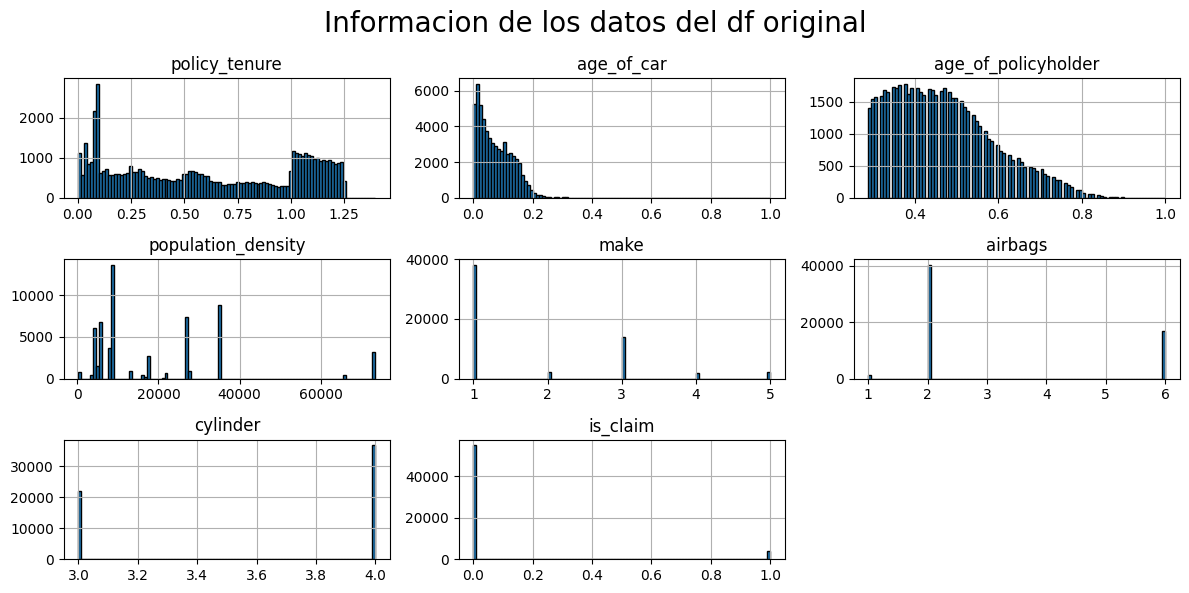

In [43]:
#Histograma con formato
df.hist(bins=100,edgecolor='black',figsize=(12,6)) #bins cant de barras, edgecolor= color de borde de barras, figzise tamaño del grafico
plt.suptitle('Informacion de los datos del df original',size=20) #Titulo al grafico
plt.tight_layout() #ajusta parametros para no superponerse

In [57]:
#Calculo los valores atipicos

def atipicos(df,columna):
    Q1=df[columna].quantile(0.25)
    Q3=df[columna].quantile(0.75)
    IQR=Q3-Q1
    lim_superior=Q3 + 1.5*IQR
    lim_inferior=Q1 - 1.5*IQR
    return df[(df[columna]<lim_inferior) |( df[columna]>lim_superior)]

In [102]:
#Calculamos los atipicos por columna
columnas=['policy_tenure','age_of_car','age_of_policyholder','population_density','make','airbags','cylinder']
a_pt=atipicos(df,'policy_tenure')
a_ac=atipicos(df,'age_of_car')
a_ap=atipicos(df,'age_of_policyholder')
a_pd=atipicos(df,'population_density')
a_m=atipicos(df,'make')
a_a=atipicos(df,'airbags')
a_c=atipicos(df,'cylinder')


In [111]:
#Concateno en un unico df
df_atipicos=pd.concat([a_pt,a_ac,a_ap,a_pd,a_m,a_a,a_c])

In [112]:
df_atipicos


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim,Caballosfuerza,CaballosFuerza,TorquePorMinuto
35,ID00036,1.193936,0.39,0.403846,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,4,Automatic,0,113.45bhp,113.45bhp,4000rpm
214,ID00215,1.224669,0.29,0.403846,C5,34738,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm
365,ID00366,1.210182,0.38,0.778846,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,4,Automatic,0,113.45bhp,113.45bhp,4000rpm
453,ID00454,1.006002,0.29,0.538462,C8,8794,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0,88.50bhp,88.50bhp,6000rpm
1057,ID01058,1.099999,0.26,0.644231,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,0.097840,0.10,0.394231,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm
58512,ID58513,0.294251,0.07,0.509615,C10,73430,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2,3,Manual,0,55.92bhp,55.92bhp,5300rpm
58557,ID58558,0.248682,0.18,0.519231,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm
58561,ID58562,0.092054,0.04,0.326923,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm


In [113]:
#Elimino duplicados
df_atipicos.drop_duplicates()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim,Caballosfuerza,CaballosFuerza,TorquePorMinuto
35,ID00036,1.193936,0.39,0.403846,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,4,Automatic,0,113.45bhp,113.45bhp,4000rpm
214,ID00215,1.224669,0.29,0.403846,C5,34738,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm
365,ID00366,1.210182,0.38,0.778846,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,4,Automatic,0,113.45bhp,113.45bhp,4000rpm
453,ID00454,1.006002,0.29,0.538462,C8,8794,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0,88.50bhp,88.50bhp,6000rpm
1057,ID01058,1.099999,0.26,0.644231,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58510,ID58511,0.097840,0.10,0.394231,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm
58512,ID58513,0.294251,0.07,0.509615,C10,73430,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2,3,Manual,0,55.92bhp,55.92bhp,5300rpm
58557,ID58558,0.248682,0.18,0.519231,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm
58561,ID58562,0.092054,0.04,0.326923,C10,73430,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,4,Manual,0,88.50bhp,88.50bhp,6000rpm


In [114]:
#Creo un df sin atipicos

df_sin_atipicos=df.drop(df_atipicos.index)

In [115]:
df_sin_atipicos.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,cylinder,is_claim
count,54480.000000,54480.000000,54480.000000,54480.000000,54480.000000,54480.000000,54480.000000,54480.000000
mean,0.618592,0.068995,0.467691,15290.251432,1.773018,3.154057,3.634068,0.065070
std,0.415047,0.054037,0.120904,11377.431787,1.140147,1.840917,0.481695,0.246651
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,3.000000,0.000000
25%,0.215603,0.020000,0.365385,6112.000000,1.000000,2.000000,3.000000,0.000000
50%,0.585217,0.060000,0.451923,8794.000000,1.000000,2.000000,4.000000,0.000000
75%,1.044464,0.110000,0.548077,27003.000000,3.000000,6.000000,4.000000,0.000000
max,1.396641,0.240000,0.817308,35036.000000,5.000000,6.000000,4.000000,1.000000


In [116]:
#Serparo mi df entre clientes con quejas o sin quejas

df_quejas=df_sin_atipicos[df_sin_atipicos['is_claim']==1]
df_sin_quejas=df_sin_atipicos[df_sin_atipicos['is_claim']==0]

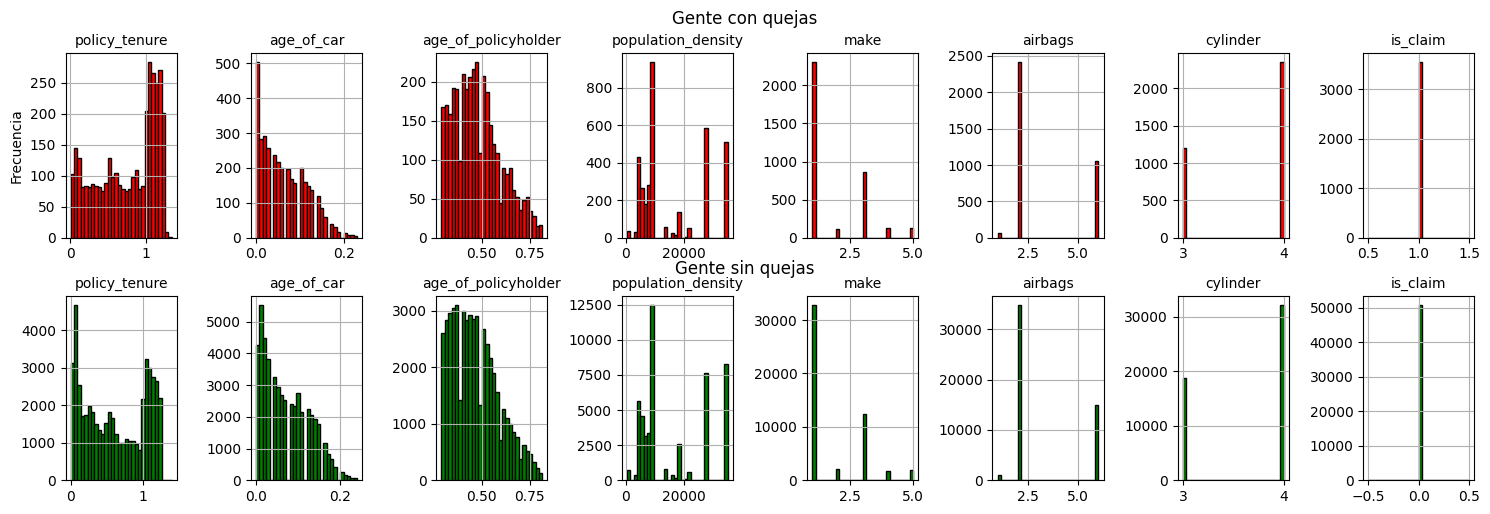

In [141]:
fig,axes=plt.subplots(nrows=2,ncols=len(columnas)+1,figsize=(15,5))
df_quejas.hist(bins=30,edgecolor='black',ax=axes[0],color='red')
axes[0,0].set_ylabel('Frecuencia')


df_sin_quejas.hist(bins=30,edgecolor='black',ax=axes[1],color='green')
axes[0,0].set_ylabel('Frecuencia')
fig.text(0.5,1,'Gente con quejas',ha='center',va='center',fontsize=12)
fig.text(0.5,0.5,'Gente sin quejas',ha='center',va='center',fontsize=12)

for ax_row in axes:
    for ax in ax_row:
        ax.title.set_size(10)

plt.tight_layout()


In [119]:
df_quejas.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,cylinder,is_claim
count,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.0
mean,0.741756,0.063585,0.477053,15091.389563,1.775176,3.174894,3.662906,1.0
std,0.388199,0.051786,0.122212,11185.658351,1.146668,1.849407,0.472784,0.0
min,0.002850,0.000000,0.288462,290.000000,1.000000,1.000000,3.000000,1.0
25%,0.409839,0.020000,0.384615,6112.000000,1.000000,2.000000,3.000000,1.0
50%,0.842793,0.050000,0.461538,8794.000000,1.000000,2.000000,4.000000,1.0
75%,1.086714,0.100000,0.548077,27003.000000,3.000000,6.000000,4.000000,1.0
max,1.335945,0.230000,0.817308,35036.000000,5.000000,6.000000,4.000000,1.0


Text(0, 0.5, 'Cant Reclamos')

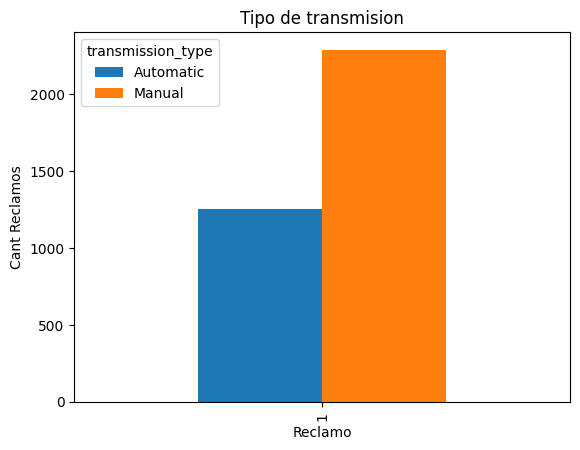

In [159]:
#Probabilidad de reclamo por transmisión

ax=df_quejas.groupby(['is_claim','transmission_type']).size().unstack().plot(kind='bar')
plt.title('Tipo de transmision')
plt.xlabel('Reclamo')
plt.ylabel('Cant Reclamos')

<Axes: title={'center': 'Tipo de transmision'}, xlabel='Reclamo', ylabel='Cant Reclamos'>

Text(0, 0.5, 'Antiguedad')

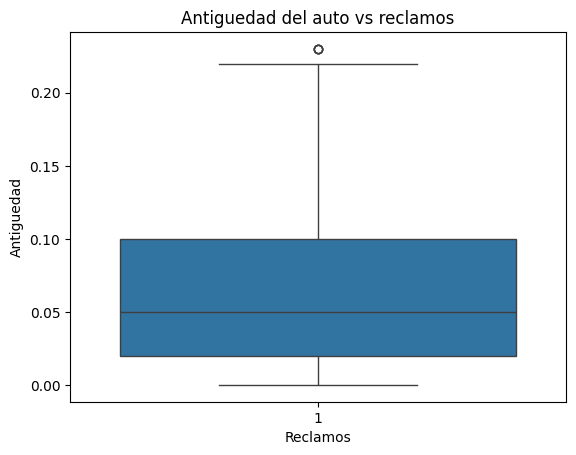

In [163]:
#Antiguedad del vehiculo con quejas

sns.boxplot(x='is_claim',y='age_of_car',data=df_quejas)
plt.title('Antiguedad del auto vs reclamos')
plt.xlabel('Reclamos')
plt.ylabel('Antiguedad')

Text(0, 0.5, 'Cilindros')

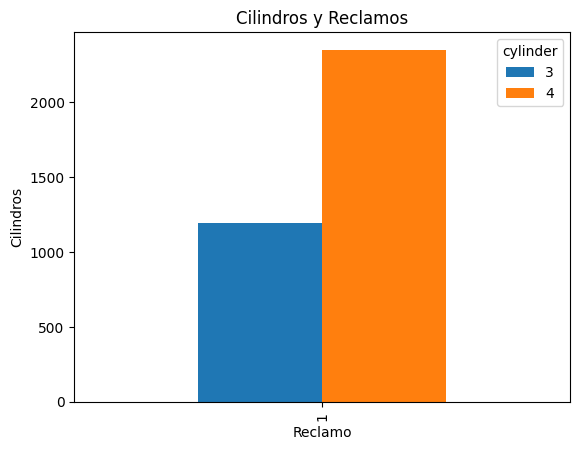

In [171]:
#Cantidad de cilindros vs quejas

ax=df_quejas.groupby(['is_claim','cylinder']).size().unstack().plot(kind='bar')
plt.title('Cilindros y Reclamos')
plt.xlabel('Reclamo')
plt.ylabel('Cilindros')